# Introduction to Machine Learning

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



(-2.5, 3.6)

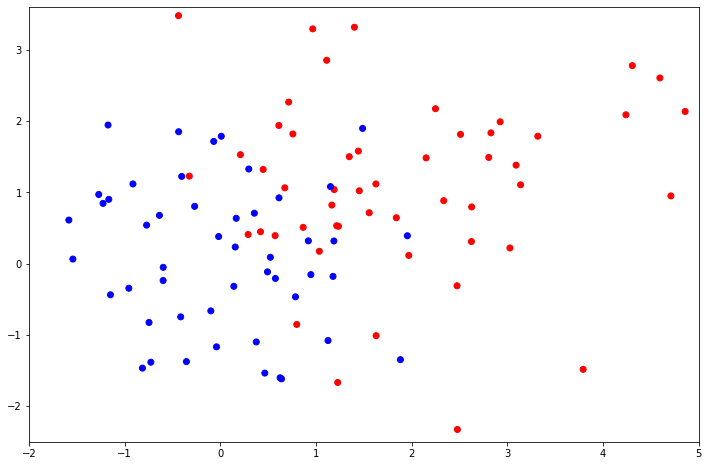

In [2]:
rng = np.random.RandomState(0)
n_samples = 100
p = 0.5 # probability of the second class
mu = [[0, 0], [2, 1]]; std = [1, 1.2]
Y = 0+(rng.rand(n_samples)<p)
X = np.zeros((n_samples, 2))
for i in range(n_samples):
    X[i,:] = rng.normal(mu[Y[i]], std[Y[i]])

plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6)

(-2.5, 3.6)

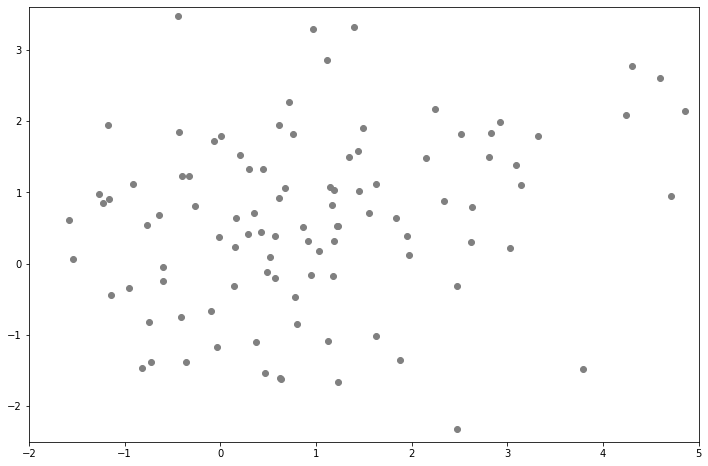

In [3]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c="gray")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6)

(-2.5, 3.6)

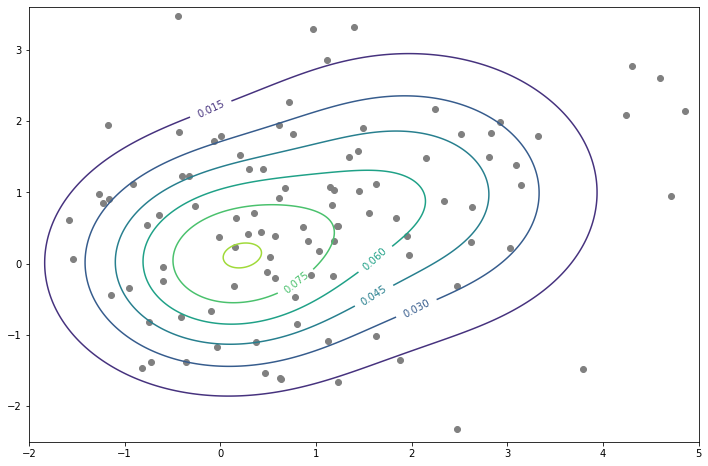

In [4]:
# Plot density of X

delta = 0.01
x1 = np.arange(-3.0, 5.0, delta)
x2 = np.arange(-2.3, 3.5, delta)
xx1, xx2 = np.meshgrid(x1, x2)
Z = p*1/(2*np.pi*std[1]**2) * np.exp(-((xx1-mu[1][0])**2+(xx2-mu[1][1])**2)/(2*std[1]**2)) + (1-p)*1/(2*np.pi*std[0]**2) * np.exp(-((xx1-mu[0][0])**2+(xx2-mu[0][1])**2)/(2*std[0]**2))
plt.figure(figsize=(12, 8))
cplot = plt.contour(x1, x2, Z)
plt.clabel(cplot, inline=1, fontsize=10)
plt.scatter(X[:,0], X[:,1], c="gray")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6)

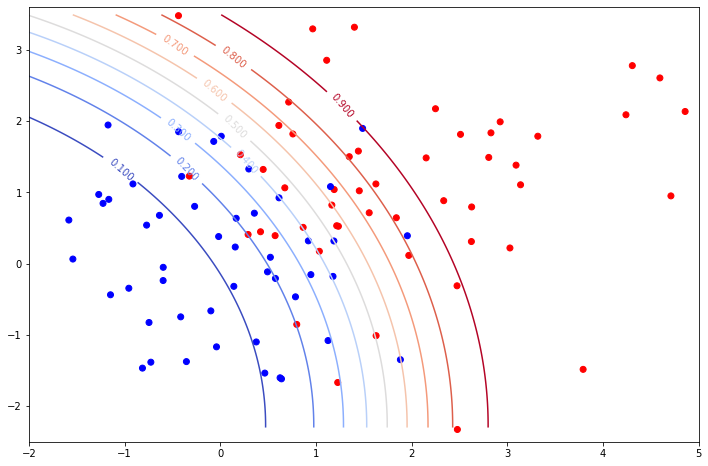

In [5]:
delta = 0.01
x1 = np.arange(-3.0, 5.0, delta)
x2 = np.arange(-2.3, 3.5, delta)
xx1, xx2 = np.meshgrid(x1, x2)
Z = np.log((1-p)/p*std[1]**2/std[0]**2) + ((xx1-mu[1][0])**2+(xx2-mu[1][1])**2)/(2*std[1]**2)-((xx1-mu[0][0])**2+(xx2-mu[0][1])**2)/(2*std[0]**2)
Z = 1/(1+np.exp(Z))
#Z = ((xx1-mu[1][0])**2+(xx2-mu[1][1])**2)-((xx1-mu[0][0])**2+(xx2-mu[0][1])**2)
plt.figure(figsize=(12, 8))
cplot = plt.contour(x1, x2, Z, [k/10 for k in range(1,10)], cmap="coolwarm")
plt.clabel(cplot, inline=1, fontsize=10)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);

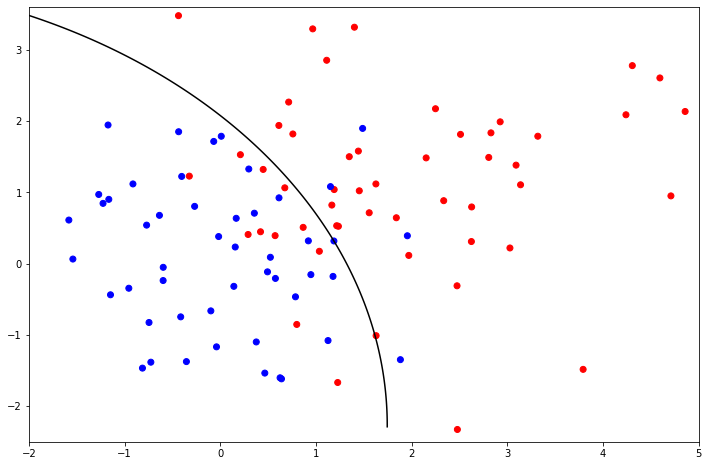

In [6]:
delta = 0.01
x1 = np.arange(-3.0, 5.0, delta)
x2 = np.arange(-2.3, 3.5, delta)
xx1, xx2 = np.meshgrid(x1, x2)
Z = np.log((1-p)/p*std[1]**2/std[0]**2) + ((xx1-mu[1][0])**2+(xx2-mu[1][1])**2)/(2*std[1]**2)-((xx1-mu[0][0])**2+(xx2-mu[0][1])**2)/(2*std[0]**2)
#Z = ((xx1-mu[1][0])**2+(xx2-mu[1][1])**2)-((xx1-mu[0][0])**2+(xx2-mu[0][1])**2)
plt.figure(figsize=(12, 8))
plt.contour(x1, x2, Z, 0, colors='black')
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);

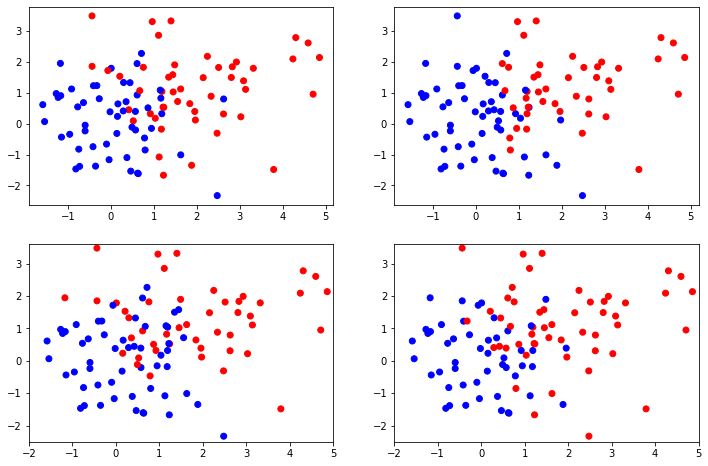

In [7]:
plt.figure(figsize=(12, 8))
for k in range(3):
    Y2 = np.zeros(n_samples)
    for i in range(n_samples):
        Y2[i] = rng.rand() < p/(1-p) * 1/(1+std[1]**2/std[0]**2*np.exp(((X[i,0]-mu[1][0])**2+(X[i,1]-mu[1][1])**2)/(2*std[1]**2)
                                                -((X[i,0]-mu[0][0])**2+(X[i,1]-mu[0][1])**2)/(2*std[0]**2)))
    plt.subplot(2,2,1+k)
    plt.scatter(X[:,0], X[:,1], c=Y2, cmap="bwr")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6)
plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);

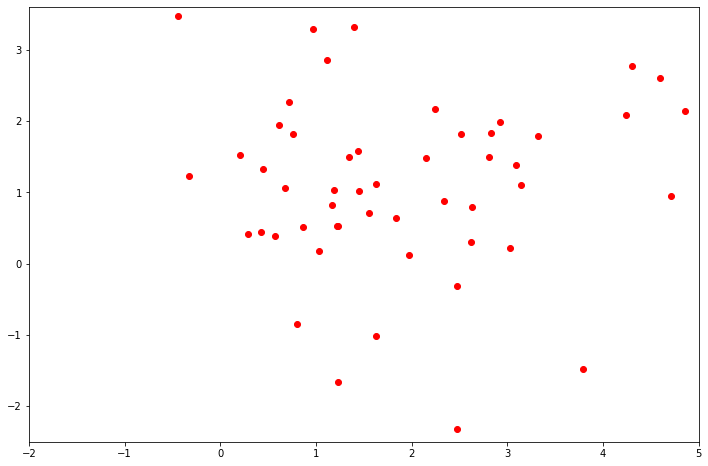

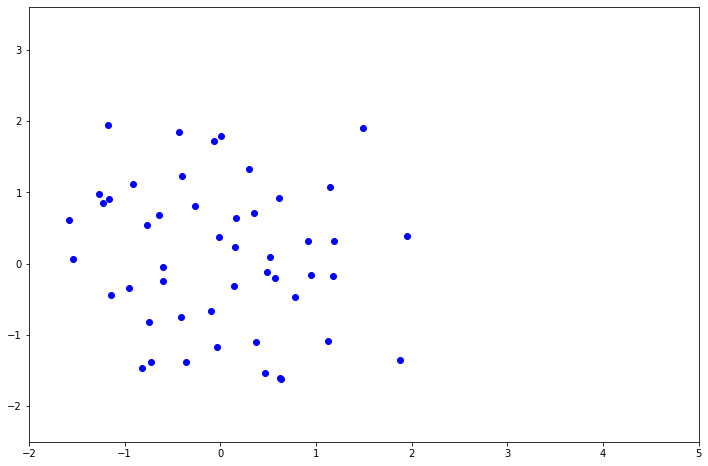

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X[Y==1,0], X[Y==1,1], c='red')
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6)
plt.figure(figsize=(12, 8))
plt.scatter(X[Y==0,0], X[Y==0,1], c='blue')
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);

# Nearest Neighbor Classification

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, Y) 

KNeighborsClassifier(n_neighbors=1)

In [10]:
Xtest = np.column_stack((xx1.flatten(), xx2.flatten()))
Ytest = neigh.predict(Xtest)

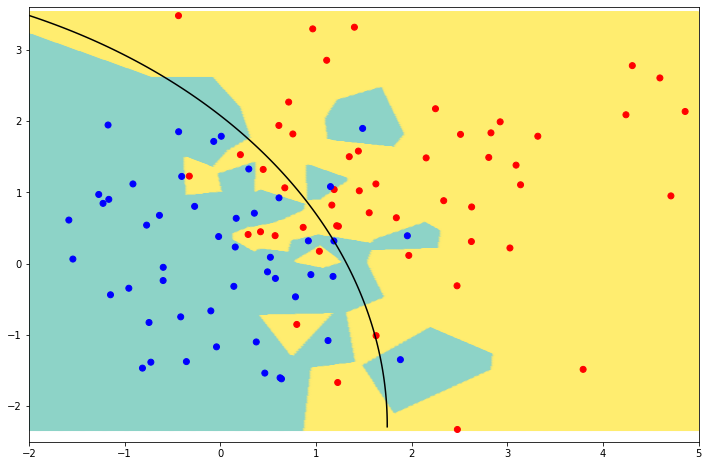

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, cmap="Set3")#"Pastel2")
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.contour(x1, x2, Z, 0, colors='black')
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);

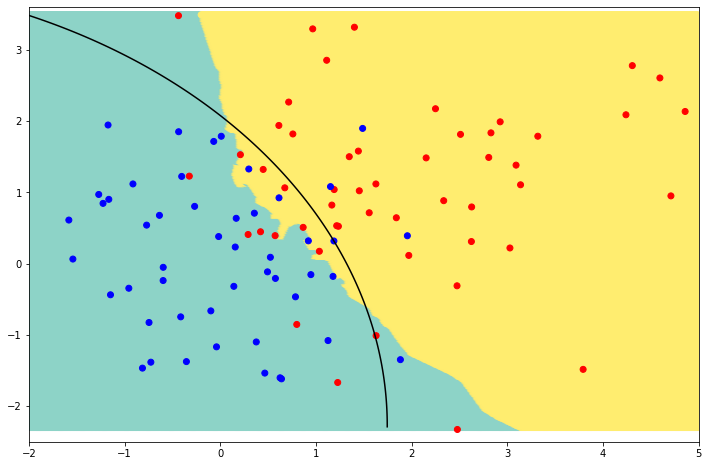

In [12]:
neigh = KNeighborsClassifier(n_neighbors=35)
neigh.fit(X, Y) 
Xtest = np.column_stack((xx1.flatten(), xx2.flatten()))
Ytest = neigh.predict(Xtest)
plt.figure(figsize=(12, 8))
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, cmap="Set3")#"Pastel2")
plt.scatter(X[:,0], X[:,1], c=Y, cmap="bwr")
plt.contour(x1, x2, Z, 0, colors='black')
plt.xlim(-2, 5); plt.ylim(-2.5, 3.6);